In [2]:
# Census Dependencies
# Census API Key
import pandas as pd
from config import (census_key, gkey)
from census import Census
c = Census(census_key, year=2018)

# Get the Population, Pverty Count, Median Household Income for the zipcode level
census_data = c.acs5.get(("B01003_001E", "B17001_002E", "B19013_001E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_df = pd.DataFrame(census_data)
census_df

,B01003_001E,B17001_002E,B19013_001E,zip code tabulation area
0,17242.0,10772.0,13092.0,00601
1,38442.0,19611.0,16358.0,00602
2,48814.0,24337.0,16603.0,00603
3,6437.0,4163.0,12832.0,00606
4,27073.0,11724.0,19309.0,00610
...,...,...,...,...
33115,15.0,0.0,-666666666.0,99923
33116,927.0,172.0,57375.0,99925
33117,1635.0,235.0,53409.0,99926
33118,38.0,28.0,-666666666.0,99927


In [3]:
# Column Reordering
census_df = census_df.rename(columns={"B01003_001E": "population",
                                      "B17001_002E": "poverty_count",
                                      "B19013_001E": "median_household_income",
                                      "zip code tabulation area": "zipcode"})
census_df

,population,poverty_count,median_household_income,zipcode
0,17242.0,10772.0,13092.0,00601
1,38442.0,19611.0,16358.0,00602
2,48814.0,24337.0,16603.0,00603
3,6437.0,4163.0,12832.0,00606
4,27073.0,11724.0,19309.0,00610
...,...,...,...,...
33115,15.0,0.0,-666666666.0,99923
33116,927.0,172.0,57375.0,99925
33117,1635.0,235.0,53409.0,99926
33118,38.0,28.0,-666666666.0,99927


In [4]:
# Add in Poverty Rate (Poverty Count / Population)
census_df["poverty_rate"] = (census_df["poverty_count"]/census_df["population"])*100
row_count = len(census_df)

print(f"Total number of records: {row_count}")
census_df

Total number of records: 33120


,population,poverty_count,median_household_income,zipcode,poverty_rate
0,17242.0,10772.0,13092.0,00601,62.475351
1,38442.0,19611.0,16358.0,00602,51.014515
2,48814.0,24337.0,16603.0,00603,49.856599
3,6437.0,4163.0,12832.0,00606,64.672984
4,27073.0,11724.0,19309.0,00610,43.305138
...,...,...,...,...,...
33115,15.0,0.0,-666666666.0,99923,0.000000
33116,927.0,172.0,57375.0,99925,18.554477
33117,1635.0,235.0,53409.0,99926,14.373089
33118,38.0,28.0,-666666666.0,99927,73.684211


In [11]:
census_df.dtypes

population                 float64
poverty_count              float64
median_household_income    float64
zipcode                      int32
poverty_rate               float64
dtype: object

In [6]:
census_df["zipcode"] = census_df["zipcode"].astype(int)
census_df.dtypes

population                 float64
poverty_count              float64
median_household_income    float64
zipcode                      int32
poverty_rate               float64
dtype: object

In [12]:
census_clean_df = census_df.dropna(how='any')
census_clean_df

,population,poverty_count,median_household_income,zipcode,poverty_rate
0,17242.0,10772.0,13092.0,601,62.475351
1,38442.0,19611.0,16358.0,602,51.014515
2,48814.0,24337.0,16603.0,603,49.856599
3,6437.0,4163.0,12832.0,606,64.672984
4,27073.0,11724.0,19309.0,610,43.305138
...,...,...,...,...,...
33115,15.0,0.0,-666666666.0,99923,0.000000
33116,927.0,172.0,57375.0,99925,18.554477
33117,1635.0,235.0,53409.0,99926,14.373089
33118,38.0,28.0,-666666666.0,99927,73.684211


In [8]:
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [11]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

Correlation Coefficient: 0.010218790628640527


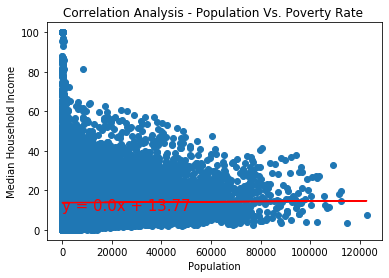

In [9]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = census_clean_df['population'].astype('float')
y_values = census_clean_df['poverty_rate'].astype('float')
# y_values = census_clean_df['median_household_income'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Population')
# plt.ylabel('Poverty_rate')
plt.ylabel("Median Household Income")
plt.title('Correlation Analysis - Population Vs. Poverty Rate ')
# plt.title('Correlation Analysis - Population Vs. Median Household Income')

print(f"Correlation Coefficient: {rvalue}")
plt.savefig('LinearRegression.png')

# Show plot
plt.show()

In [13]:
census_clean_df.to_csv(r'static/data/rw_census_data.csv', index=False, header=True)
